In [3]:
from model import DenseLayer, ReLU, MSELoss
import numpy as np
import matplotlib.pyplot as plt



In [4]:
# Dataset
X = np.linspace(-3, 3, 200).reshape(-1, 1)
y = X**3 + 0.5*X**2 - X + np.random.normal(0, 3, X.shape)

In [5]:

# Model
layer1 = DenseLayer(1, 10)
relu = ReLU()
layer2 = DenseLayer(10, 1)
loss_fn = MSELoss()


In [6]:
# Training
lr = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward
    z1 = layer1.forward(X)
    a1 = relu.forward(z1)
    y_pred = layer2.forward(a1)

    # Loss
    loss = loss_fn.forward(y_pred, y)
    losses.append(loss)

    # Backward
    dL = loss_fn.backward(y_pred, y)
    dA1 = layer2.backward(dL, lr)
    dZ1 = relu.backward(dA1)
    _ = layer1.backward(dZ1, lr)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 85.6216
Epoch 100, Loss: 85.5689
Epoch 200, Loss: 85.5175
Epoch 300, Loss: 85.4670
Epoch 400, Loss: 85.4175
Epoch 500, Loss: 85.3687
Epoch 600, Loss: 85.3208
Epoch 700, Loss: 85.2735
Epoch 800, Loss: 85.2269
Epoch 900, Loss: 85.1808


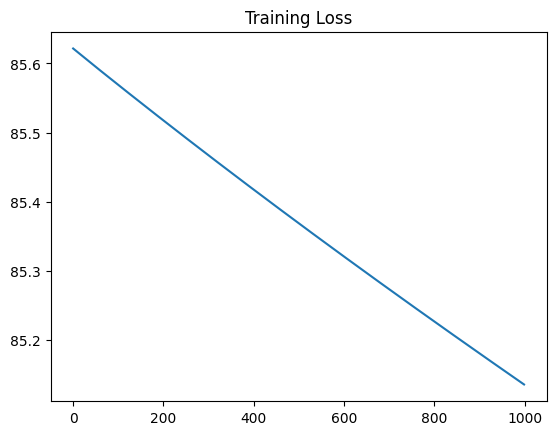

In [7]:
# Plot loss
plt.plot(losses)
plt.title("Training Loss")
plt.show()

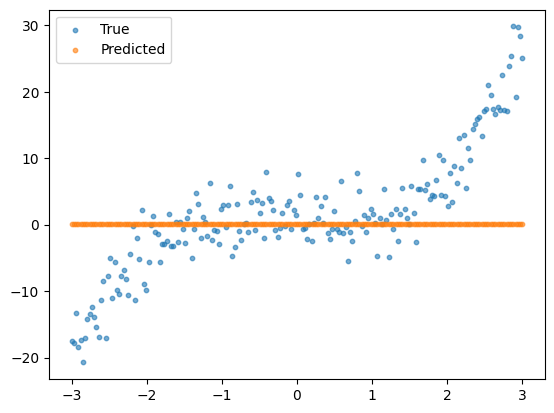

In [8]:
# Plot predictions
plt.scatter(X, y, s=10, alpha=0.6, label="True")
plt.scatter(X, y_pred, s=10, alpha=0.6, label="Predicted")
plt.legend()
plt.show()
